# Landfast Sea Ice (Mahoney)

## Background
This curation notebook is for Andy Mahoney's Landfast Sea Ice data set. Currently these data are found in the directories `/workspace/CKAN/CKAN_Data/InteRFACE/Beaufort/` and `.../Chukchi/`.

The data in this notebook correspond to the following [publication](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2006JC003559):

>Mahoney, A., Eicken, H., Gaylord, A. G., and Shapiro, L. (2007), Alaska landfast sea ice: Links with bathymetry and atmospheric circulation, <i>J. Geophys. Res.,</i> 112, C02001, doi:10.1029/2006JC003559. 

Users of these data should use the above citation, and are encouraged to read the publication as well.

### What to know about these data

* What
  * Landfast ice is sea ice that is continguous to the coast and is stable for approximately 20 days.
  * Islands are excluded except for Herschel and Barter Islands.
* Where
  * The spatial domain is northern Alaska and northwestern Canada and Point Barrow marks the boundary between the Chukchi and Beaufort Seas.
* When
  * The data represent eight annual (1996-2004) landfast ice cycles that span October to July.
* How
  * The data are derived from RADARSAT-1 data aquired using the the high-resolution ScanSAR operation mode of the synthetic aperture radar (SAR) sensor.
    * C-Band (5.3 GHz), 5.6 cm wavelength, HH polarization
    * The satellite can "see" landfast ice because it has a distinct backscatter signature.
    * There is an average 10-day period between SAR mosaics.
* Why?
  * From the publication, quote:
    >In the Arctic, landfast sea ice is a key element of the coastal system, integral to a wide range of geological and biological processes as well as human activities. The presence of landfast ice can mitigate the effect of winter storms on the coast but also impede navigation in the spring. As well as being of great importance to native subsistence activities [Nelson, 1969; George et al., 2004], the presence or absence of landfast in northern Alaska and its stability are of considerable economic importance for offshore development.

#### Key Acronyms
 - SLIE: Seaward Looking Landfast Ice Edge
 - LFIW: Landfast Ice Width
 - SAR: Synthetic Aperature Radar
- - - -
## Data Expectations
### Data Variables
* SLIE (a line representing the minimum offshore extent of continguous stationary ice during the three mosaic (~20 day) period)
  * Details
    * Seaward and inshore (spring only) edges are distinguished.
    * Advancing SLIE is assigned the mean date of the first of the three mosaics.
    * Retreating ice edge is the mean date of the last mosaic.
    * Different parts of the ice may be retreating and advancing at the same time, so this is why such a date scheme is applied.
  * Data Formats + Volumes
    * There should be mosaic images where SLIE is delineated
    * Each mosaic consists of imagery spanning a 2 to 3 day period.
    * 28 to 35 mosaics per annual ice cycle.
    * 238 mosaics total.
    * Landfast ice is defined using a set of three mosaics (spanning ~20 days).
    * Ideally these are gridded in a known geospatial format
    * 222 SLIEs were delineated in this study.
  * Flavors
    * Annual summaries indicating the fraction of the annual cycle (October to July) that a pixel is occupied by landfast ice.
    * Monthly (October to July) min / mean / max SLIE positions
* LFIW (Landfast Ice Width)
  * Details
    * Measured along transects (N=1935) where distance between the coast and the SLIE was measured.
      * These transects were thena baainned into 200 groups for which means were calculated.
  * Data Formats and Volumes
    * There should be 200 point locations that contain a time series of LFIW.
    * Ideally these are in a tabular format (CSV) or some point vector geometry (.shp).
* Water Depth at the SLIE
    * Details
      * Bathymetry is important to sea ice. Sometimes the 20 m isobath resembles the SLIE.
      * This was measured for the same 200 transects described for LFIW.
      * Assume that water depths in which the SLIE is most frequently observed correspond to depths in which the SLIE is most stable
    * Flavors
      * Modal Water Depth by Month
* Key Events in the annual ice cyclea
  * Details
    * The 200 coastal point locations used to bin the transects have time series data to identify the key events in the ice cycle, including:
      1. The first ice on coasts (first occurence of more than 500 m of ice at the coast)
      2. onset of stable landfast ice (stable period is the longest period in which the SLIE occupies water of 15 m or deeper).
      3. Breakup (fastest reduction in LFIW during the tail of the season when landfast ice is no longer advancing)
      4. Ice-free coasts (LFIW is less than 500 m).
   * But not all cycles have these events because of data availability! Landfast was already present along an average of 67% of the coast in 1996, 1997, and 1998, when the first available mosaics were acquired. In the remaining years this only occurred in 6% of time series. These occurrences and the entire first 3 years are excluded from the analysis of the dates of the first ice on coasts event. All four events have an error of +- 5 days.


These data correspond in part to the following NSIDC archive:
https://nsidc.org/sites/nsidc.org/files/G02173-V001-UserGuide.pdf

## Data Digging
This notebook assumes that these data are copied to `$SCRATCH_DIR`. Set this environment variable via your shell or just run the code cell below to do the same thing. Note that the `GDAL_DATA` and `PROJ_LIB` environment variables may not be set when the environment is activated (possible anaconda-project issue) if they are already set in the parent conda env. You can set them explicitly here if needed. 

In [1]:
import os
os.environ["SCRATCH_DIR"] = "/atlas_scratch/kmredilla/ardac/landfast_seaice/"
# env_path = "envs/default/share/"
# os.environ["PROJ_LIB"] = f"{env_path}/proj"
# os.environ["GDAL_DATA"] = f"{env_path}/gdal"

Here is the directory structure without any files displayed:

In [2]:
!tree $SCRATCH_DIR -d

/atlas_scratch/kmredilla/ardac/landfast_seaice/
├── Beaufort
│   ├── 1998-99
│   │   └── Mosaics_1998-99
│   ├── 1999-00
│   │   └── Mosaics_1999-00
│   ├── 2000-01
│   │   └── Mosaics_2000-01
│   ├── 2001-02
│   │   └── Mosaics_2001-02
│   │       ├── NotUsed
│   │       ├── PrudhoeBay
│   │       └── Unused
│   ├── 2002-03
│   │   └── Mosaics_2002-03
│   ├── 2003-04
│   │   └── Mosaics_2003-04
│   ├── 2004-05
│   ├── 2005-06
│   ├── 2006-07
│   ├── 2007-08
│   └── AllSeasonsAnalysis
│       ├── MonthlySLIEs
│       │   ├── ASCII_Data
│       │   │   └── mean
│       │   ├── ASCII_geocoords
│       │   │   ├── Shapefiles
│       │   │   └── WithHeaders
│       │   └── MinMeanMax
│       │       └── ASCIIGeoCoords_AKAlb
│       └── SLIE_Events
├── Chukchi
│   ├── 1996-97
│   ├── 1997-98
│   ├── 1998-99
│   ├── 1999-00
│   ├── 2000-01
│   ├── 2001-02
│   ├── 2002-03
│   ├── 2003-04
│   ├── 2004-05
│   ├── 2005-06
│   ├── 2006-07
│   ├── 2007-08
│   └── AllSeasonsAnalysis
│       ├── Mon

We can assume the basic organizational scheme here is regional (Chukchi Sea vs. Beaufort Sea) and then temporal (by annual ice season or summary of all seasons). However, it is clear from the directories alone that we do not have a homogenous data structure across regions or ice seasons. Let's take a closer look at a few directories.

In [3]:
!tree $SCRATCH_DIR/Beaufort/2004-05 | head -10
!tree $SCRATCH_DIR/Beaufort/2004-05 | tail -10

/atlas_scratch/kmredilla/ardac/landfast_seaice//Beaufort/2004-05
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── r2004_276-304_slie.tif
├── r2004_286-315_slie.tif
├── r2004_300-328_slie.tif
├── r2004_313-336_slie.tif
├── SLIEdgestack_2004-05.tif
├── SLIEstack_2004-05.tif
├── SLIEstack_color+edge_2004-05.tif
├── wdep.csv
├── wdep_moregmean.csv
├── wdep_moregstdev.csv
├── wdep_regmean.csv
└── wdep_regstdev.csv

0 directories, 43 files


In [4]:
!tree $SCRATCH_DIR/Chukchi/2004-05 | head -10
!tree $SCRATCH_DIR/Chukchi/2004-05 | tail -10

/atlas_scratch/kmredilla/ardac/landfast_seaice//Chukchi/2004-05
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── r2004_279-304_slie.tif
├── r2004_294-321_slie.tif
├── r2004_303-328_slie.tif
├── r2004_318-338_slie.tif
├── SLIEstack_2004-05_col.tif
├── SLIEstack_2004-05.tif
├── SLIEstack_color+edge_2004-05.tif
├── wdep.csv
├── wdep_moregmean.csv
├── wdep_moregstdev.csv
├── wdep_regmean.csv
└── wdep_regstdev.csv

0 directories, 42 files


This directory comparison is actually quite promising - we see the key variables that we expect from our background reading of the paper (SLIE, LFIW, and Water Depth (convention appears to be `wdep`). The SLIE data are in GeoTIFF format, and it appears that the individual landfast ice scenes and stacked annual summaries are also available. The Water Depth and LFIW data are tabular, and we'd expect 200 records, one for each transect bucket, or 1500 + records, one for each transect. It appears there are some statistical summaries for each of these also. I'm guessing that the `reg` and `mo` naming conventions in those .csv filenames stand for `region` and `monthly`, respectively. Finally, note that these two directories contain a different number of files. This is expected and caused by differences in the satellite revist frequency. However, not all things are equal between the Beaufort and Chukchi regions, as there are directories for 1996-87 and 1997-98 in the Chukchi directory, but not the Beaufort. Also, there are some oddball data structures where the two regions both have data. Consider the case of the 1999-2000 ice season:

In [5]:
!tree $SCRATCH_DIR/Beaufort/1999-00 | head -10
!tree $SCRATCH_DIR/Beaufort/1999-00 | tail -10

/atlas_scratch/kmredilla/ardac/landfast_seaice//Beaufort/1999-00
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── Mosaics_1999-00
│   ├── r1999_276-279_mos.tif
│   ├── r1999_288-290_mos.tif
│   ├── r1999_295-297_mos.tif
├── SLIEdgestack_1999-00.tif
├── SLIEstack_1999-00.tif
├── SLIEstack_color+edge_1999-00.tif
├── wdep.csv
├── wdep_moregmean.csv
├── wdep_moregstdev.csv
├── wdep_regmean.csv
└── wdep_regstdev.csv

1 directory, 76 files


In [6]:
!tree $SCRATCH_DIR/Chukchi/1999-00 | head -10
!tree $SCRATCH_DIR/Chukchi/1999-00 | tail -10

/atlas_scratch/kmredilla/ardac/landfast_seaice//Chukchi/1999-00
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── r1999_281-299_slie.tif
├── r1999_292-308_slie.tif
├── r1999_296-317_slie.tif
├── r1999_306-330_slie.tif
├── SLIEstack_1999-00_col.tif
├── SLIEstack_1999-00.tif
├── SLIEstack_color+edge_1999-00.tif
├── wdep.csv
├── wdep_moregmean.csv
├── wdep_moregstdev.csv
├── wdep_regmean.csv
└── wdep_regstdev.csv

0 directories, 42 files


It seems that the Beaufort directories also contain the individual mosaics as well as the SLIE (delineated from a set of three mosaics). We'll want to take a closer look at both the SLIE extents and the mosaics. It is also not really clear what the various "stack" or "edgestack" or "color" or "col" version of SLIE data are, so that needs to be dug into as well. Next, we'll take a look at the "All Season" directories.

In [7]:
!tree $SCRATCH_DIR/Chukchi/AllSeasonsAnalysis | head -10
!tree $SCRATCH_DIR/Chukchi/AllSeasonsAnalysis | tail -10

/atlas_scratch/kmredilla/ardac/landfast_seaice//Chukchi/AllSeasonsAnalysis
├── lfiw_all.csv
├── MonthlySLIEs
│   ├── ASCII_Data
│   │   ├── lfiw_mo5m_max.csv
│   │   ├── lfiw_mo5m_max_slieN.csv
│   │   ├── lfiw_mo5m_mean.csv
│   │   ├── lfiw_mo5m_median.csv
│   │   ├── lfiw_mo5m_min.csv
│   │   ├── lfiw_mo5m_min_slieN.csv
│   ├── event_03_maxice_datestr.csv
│   ├── event_04_unstableice_datenum.csv
│   ├── event_04_unstableice_datestr.csv
│   ├── event_05_breakup_datenum.csv
│   ├── event_05_breakup_datestr.csv
│   ├── event_06_icefree_datenum.csv
│   └── event_06_icefree_datestr.csv
└── wdep_all.csv

4 directories, 146 files


In [8]:
!tree $SCRATCH_DIR/Beaufort/AllSeasonsAnalysis | head -10
!tree $SCRATCH_DIR/Beaufort/AllSeasonsAnalysis | tail -10

/atlas_scratch/kmredilla/ardac/landfast_seaice//Beaufort/AllSeasonsAnalysis
├── lfiw_all.csv
├── lfiw_all.xlsx
├── MonthlySLIEs
│   ├── ASCII_Data
│   │   ├── Current_mag+dir.csv
│   │   ├── Current_mag+dir.xls
│   │   ├── lfiw_mo5m_max.csv
│   │   ├── lfiw_mo5m_max_slie.csv
│   │   ├── lfiw_mo5m_max_slieN.csv
│   ├── event_03_maxice_datestr.csv
│   ├── event_04_unstableice_datenum.csv
│   ├── event_04_unstableice_datestr.csv
│   ├── event_05_breakup_datenum.csv
│   ├── event_05_breakup_datestr.csv
│   ├── event_06_icefree_datenum.csv
│   └── event_06_icefree_datestr.csv
└── wdep_all.csv

9 directories, 425 files


OK these directories have some important-looking monthly summaries that definitely correspond to the monthly summary SLIE data we identified in our initial data expectations. We might be able to reproduce these data from the seasonal data. We'll definitely revist these directories!

### Data Puzzle Number 1: What's up with the mosaics?

There seem to be two main types of raster data here: SLIE (`_slie` suffix) and mosaics (`_mos` suffix) for the Beaufort region. We should understand how the `mos` files differ from the `_slie` files. We should also know how the different SLIE `stack` flavors differ within each region and ice season. First, let's look at the mosaic data. How many files are there? What is in them? I'm *guessing* these are just the mosaiced and processed backscatter images, and we might actually not need them in the curated version of the dataset because they're a low-level product and not available for all regions and seasons.

In [9]:
# import the usual data tools
import random
import rasterio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import re
import pandas as pd
from pathlib import Path
from multiprocessing import Manager, Pool
from copy import deepcopy
from rasterio.plot import show
random.seed(907)
scratch_dir = Path(os.getenv("SCRATCH_DIR"))

In [10]:
# set up a few functions to parse filenames
def get_doy(fp):
    try:
        doy = re.match(r'.*([0-3][0-9][0-9]-[0-3][0-9][0-9])', fp).group(1)
    except:
        doy = re.match(r'.*([0-3][0-9][0-9]_[0-3][0-9][0-9])', fp).group(1)
        doy = doy.replace("_", "-")
    return doy

def get_re_year(fp):
    year = re.match(r'.*([1-3][0-9]{3})', fp).group(1)
    return year


def get_year(fp):
    year = fp[1:5]
    return year

In [11]:
mosaic_fps = [x for x in scratch_dir.rglob("*mos.tif")]
n_fps = len(mosaic_fps)
mosaic_years = set([get_year(x.name) for x in mosaic_fps])
regions = set([x.parts[5] for x in mosaic_fps])

print(f"%d mosaic geotiffs in the region %s region across the following ice seasons:\n %s" % (n_fps, str(regions), str(mosaic_years)))

177 mosaic geotiffs in the region {'Beaufort'} region across the following ice seasons:
 {'2000', '2001', '2003', '2002', '1999', '2004'}


OK it clear that we are missing mosaic geotiffs for many ice seasons and for all of the Chukchi region. I'm not too concerned about this because I think it confirms that these are a lower-level data product that won't be a fit for the ultimate curated collection. The full count of mosaics should be closer to the N=238 described in the publication. But, to be on the safe side we can pop a few of these GeoTIFFs open and take a look.

In [12]:
def generate_mos_di(rstrs):
    
    di = {}
    
    for fp in rstrs:
        trimmed_fp = fp.name[:-4]
        year = get_year(trimmed_fp)
        doy = get_doy(trimmed_fp)
        fp_key = year + " Mosaic for DOY range: " + doy
        di[fp_key] = {}
        with rasterio.open(fp) as src:
            arr = src.read(1).astype(float)
            arr[arr == src.nodata] = np.nan
            di[fp_key]["fp"] = fp
            di[fp_key]["arr"] = arr
            di[fp_key]["min"] = np.round(np.nanmin(arr), 2)
            di[fp_key]["max"] = np.round(np.nanmax(arr), 2)
            di[fp_key]["mean"] = np.round(np.nanmean(arr), 2)
            di[fp_key]["sd"] = np.round(np.nanstd(arr), 2)
            di[fp_key]["width"] = arr.shape[1]
            di[fp_key]["height"] = arr.shape[0]
            di[fp_key]["year"] = year
            di[fp_key]["pixel_size_m"] = src.profile["transform"][0]
    return di

nine_mosaic_fps = random.sample(mosaic_fps, 9)
mosaic_di = generate_mos_di(nine_mosaic_fps)

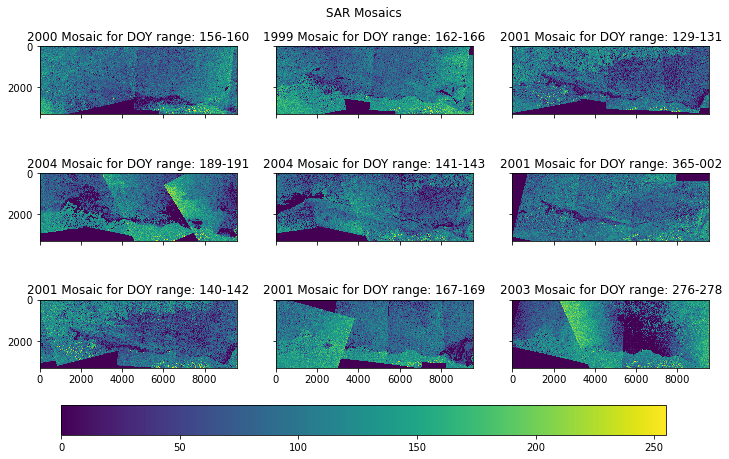

In [13]:
def plot_mos_maps(di):

    fig, axs = plt.subplots(3, 3, figsize=(12, 7), sharex=True, sharey=True)
    fig.patch.set_facecolor("white")
    plt.suptitle("SAR Mosaics", y=0.9)
    plt.subplots_adjust(hspace=0)
    vmax = 255
    vmin = 0

    for ax, k in zip(axs.flatten(), di.keys()):
        ax.imshow(di[k]["arr"], vmin=vmin, vmax=vmax, cmap="viridis", interpolation="none")
        ax.set_title(k)

    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
    fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")

plot_mos_maps(mosaic_di)

Yep, these are 100 m x 100 m spatial resolution SAR mosaics that are normalized to an integer data type across the 8 bit (0 to 255) range. We can set these mosaics aside for now.

### Data Puzzle Number 2: Flavors of SLIE
We know from our initial dig into the directory structures that there are a few different styles of SLIE products: SLIE delineated from individual mosaics, "stacked" SLIE data that encompass an entire ice season, and then "stacked" with some type of "color" or "edge" modifier. To keep it simple we can try to assess the SLIEs derived from individual mosaics first.

* Chukchi and Beaufort regions both have `SLIEstack_color+edge_<year>.tif`
* Chukchi and Beaufort regions both have `SLIEstack_<year>.tif`
* Chukchi has `SLIEstack_<year>_col.tif`
* Beaufort has `SLIEdgestack_<year>.tif`

There are also some other CSVs with these data: `sliedatenum.csv` and `sliedatestr.csv`

In [15]:
slie_fps = [x for x in scratch_dir.rglob("*_slie.tif")]
n_slie_fps = len(slie_fps)
n_slie_fps

566

In [28]:
def generate_binary_raster_di(rstrs):
    
    di = {}
    
    for fp in rstrs:
        trimmed_fp = fp.name[:-4]
        year = get_year(trimmed_fp)
        doy = get_doy(trimmed_fp)
        fp_key = year + "-" + doy
        di[fp_key] = {}
        with rasterio.open(fp) as src:
            arr = src.read(1).astype(float)
            arr[arr == src.nodata] = np.nan
            di[fp_key]["fp"] = fp
            di[fp_key]["arr"] = arr
            di[fp_key]["min"] = np.round(np.nanmin(arr), 2)
            di[fp_key]["max"] = np.round(np.nanmax(arr), 2)
            di[fp_key]["vals"] = np.unique(arr)
            di[fp_key]["width"] = arr.shape[1]
            di[fp_key]["height"] = arr.shape[0]
            di[fp_key]["year"] = year
            di[fp_key]["pixel_size_m"] = src.profile["transform"][0]
            di[fp_key]["crs"] = src.crs
    return di


def plot_binary_maps(di, region):

    if region == "Chukchi":
        fsize = (10, 11)
    else:
        fsize = (10, 7)
        
    cmap = plt.get_cmap('gray', 4)
    
    labels = np.array(["Ocean or Non-landfast Ice", "No Data", "Land", "Landfast Ice"])
    
    fig, axs = plt.subplots(3, 3, figsize=fsize, sharex=True, sharey=True)
    fig.patch.set_facecolor("white")
    plt.suptitle(region + " SLIE (InteRFACE)", y=0.93)
    if region == "Chukchi":
        plt.subplots_adjust(hspace=0)
    else:
        plt.subplots_adjust(hspace=0.1)
    vmax = 255
    vmin = 0

    
    for ax, k in zip(axs.flatten(), di.keys()):
        ax.imshow(di[k]["arr"], vmin=vmin, vmax=vmax, cmap=cmap, interpolation="none")
        ax.set_title(k)

    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.054])
    fig.colorbar(axs[0,0].images[0], cax=cbar_ax, ticks=[32, 96, 160, 225], orientation="horizontal")
    cbar_ax.set_xticklabels(labels)

In [23]:
chukslie_fps = [x for x in Path(scratch_dir/"Chukchi").rglob("*_slie.tif")]
binary_chukslie = generate_binary_raster_di(random.sample(chukslie_fps, 9))

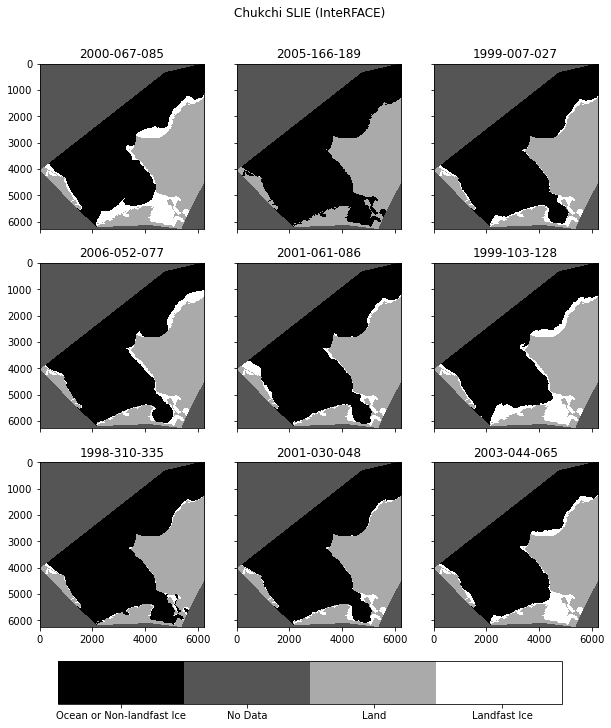

In [29]:
plot_binary_maps(binary_chukslie, "Chukchi")
plt.savefig("chukchi_slie.png", bbox_inches="tight", dpi=144)

In [30]:
beauslie_fps = [x for x in Path(scratch_dir/"Beaufort").rglob("*_slie.tif")]
binary_beauslie = generate_binary_raster_di(random.sample(beauslie_fps, 9))

In [32]:
[binary_beauslie[x]["vals"] for x in binary_beauslie.keys()]

[array([  0., 128., 255.]),
 array([  0., 128., 255.]),
 array([  0., 128., 255.]),
 array([  0., 128., 255.]),
 array([  0., 128., 255.]),
 array([  0., 128., 255.]),
 array([  0., 128., 255.]),
 array([  0., 128., 255.]),
 array([  0., 128., 255.])]

In [33]:
len(beauslie_fps)

250

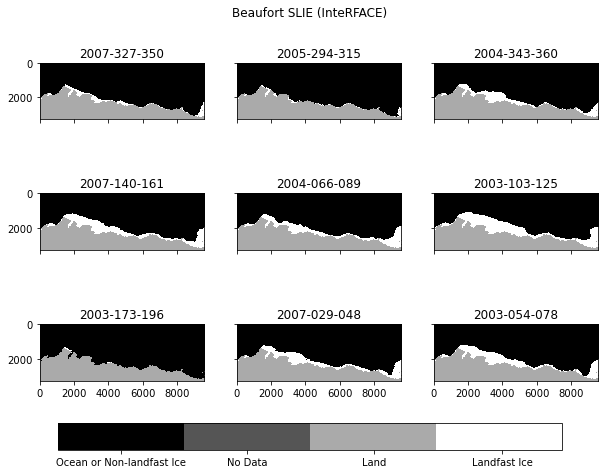

In [35]:
plot_binary_maps(binary_beauslie, "Beaufort")
plt.savefig("beaufort_slie.png", bbox_inches="tight", dpi=144)

In [36]:
# a function to stash the inspection results of all 500+ slie geotiffs

def mp_generate_slie_di(di, fp):

        trimmed_fp = fp.name[:-4]
        ice_season = fp.parts[-2]
        year = get_year(trimmed_fp)
        doy = get_doy(trimmed_fp)
        if "Beaufort" in str(fp):
            region = "Beaufort"
        elif "Chukchi" in str(fp):
            region = "Chukchi"
        else:
            region = "None"
        fp_key = year + " " + region + " SLIE for DOY range: " + doy
        
        di[fp_key] = manager.dict()
        di[fp_key]["fp"] = fp
        di[fp_key]["region"] = region
        di[fp_key]["year"] = year
        di[fp_key]["ice_season"] = ice_season
        
        with rasterio.open(fp) as src:
            arr = src.read(1).astype(float)
            arr[arr == src.nodata] = np.nan
            di[fp_key]["min"] = np.round(np.nanmin(arr), 2)
            di[fp_key]["max"] = np.round(np.nanmax(arr), 2)
            di[fp_key]["width"] = arr.shape[1]
            di[fp_key]["height"] = arr.shape[0]
            di[fp_key]["pixel_size_m"] = src.profile["transform"][0]

In [37]:
# may i speak with the manager
# this is a way to build a dict with multiple processes
# the manger sort of protects the dictionary
manager = Manager()
d = manager.dict()
pool = Pool(32)

for fp in slie_fps:
    pool.apply_async(mp_generate_slie_di, args=(d, fp))

pool.close()
pool.join()

In [38]:
# then we turn this into a "real" dictionary
# this is sort of a weird pattern, not sure I'd do this again but it works for now
slie_di = dict(deepcopy(d))
for k in slie_di.keys():
    slie_di[k] = dict(deepcopy(d[k]))
del d

In [39]:
# and then to a dataframe
def df_from_di(di):
    df = pd.DataFrame.from_dict(di).T
    return df
slie_df = df_from_di(slie_di)
slie_df

,fp,region,year,ice_season,min,max,width,height,pixel_size_m
2000 Beaufort SLIE for DOY range: 331-351,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2000,2000-01,0.0,255.0,9554,3298,100.0
2000 Beaufort SLIE for DOY range: 286-311,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2000,2000-01,0.0,255.0,9554,3298,100.0
2000 Beaufort SLIE for DOY range: 275-297,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2000,2000-01,0.0,255.0,9554,3298,100.0
2000 Beaufort SLIE for DOY range: 295-328,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2000,2000-01,0.0,255.0,9554,3298,100.0
2001 Beaufort SLIE for DOY range: 013-040,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2001,2000-01,0.0,255.0,9554,3298,100.0
...,...,...,...,...,...,...,...,...,...
2005 Chukchi SLIE for DOY range: 144-168,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Chukchi,2005,2004-05,0.0,255.0,6234,6271,100.0
2005 Chukchi SLIE for DOY range: 159-178,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Chukchi,2005,2004-05,0.0,255.0,6234,6271,100.0
2005 Chukchi SLIE for DOY range: 166-189,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Chukchi,2005,2004-05,0.0,255.0,6234,6271,100.0
2005 Chukchi SLIE for DOY range: 174-195,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Chukchi,2005,2004-05,0.0,255.0,6234,6271,100.0


In [40]:
reg_season_count = slie_df[['region','ice_season']].value_counts()
min_count = slie_df['min'].value_counts()
max_count = slie_df['max'].value_counts()
ps_count = slie_df['pixel_size_m'].value_counts()
width_count = slie_df[['region', 'width']].value_counts()
height_count = slie_df[['region', 'height']].value_counts()

In [41]:
reg_season_count.groupby(["ice_season", "region"]).unique()

ice_season  region  
1996-97     Chukchi     [25]
1997-98     Chukchi     [24]
1998-99     Chukchi     [28]
1999-00     Beaufort    [29]
            Chukchi     [27]
2000-01     Beaufort    [28]
            Chukchi     [28]
2001-02     Beaufort    [33]
            Chukchi     [26]
2002-03     Beaufort    [27]
            Chukchi     [26]
2003-04     Beaufort    [27]
            Chukchi     [26]
2004-05     Beaufort    [28]
            Chukchi     [27]
2005-06     Beaufort    [27]
            Chukchi     [27]
2006-07     Beaufort    [27]
            Chukchi     [29]
2007-08     Beaufort    [24]
            Chukchi     [23]
dtype: object

In [42]:
height_count

region    height
Chukchi   6271      316
Beaufort  3298      250
dtype: int64

In [43]:
width_count

region    width
Chukchi   6234     316
Beaufort  9554     250
dtype: int64

In [44]:
ps_count

100.0    566
Name: pixel_size_m, dtype: int64

This looks good. All SLIE GeoTIFFs have 100 m pixels, and the Chukchi and Beaufort regions are internally consistent in their width and height. We have different counts for each ice season and region, which again is expected because of satellite data availability. However, it does seem odd that there are no data for the Beaufort region for the ice seasons of 1996-97, 1997-98, and 1998-99.

In [45]:
min_count

0.0    566
Name: min, dtype: int64

In [46]:
max_count

255.0    557
128.0      9
Name: max, dtype: int64

All data are in the 0 to 255 range, but it is surprising to see that 9 of the 566 GeoTIFFs have a max value of 128 instead of 255. We'll want to take a closer look at those!

In [47]:
slie_df[slie_df["max"] == 128.0]

,fp,region,year,ice_season,min,max,width,height,pixel_size_m
2001 Beaufort SLIE for DOY range: 189-210,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2001,2000-01,0.0,128.0,9554,3298,100.0
2004 Beaufort SLIE for DOY range: 170-191,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2004,2003-04,0.0,128.0,9554,3298,100.0
2004 Beaufort SLIE for DOY range: 179-200,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2004,2003-04,0.0,128.0,9554,3298,100.0
2004 Beaufort SLIE for DOY range: 189-211,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2004,2003-04,0.0,128.0,9554,3298,100.0
2002 Beaufort SLIE for DOY range: 179-203,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2002,2001-02,0.0,128.0,9554,3298,100.0
2002 Beaufort SLIE for DOY range: 193-211,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2002,2001-02,0.0,128.0,9554,3298,100.0
2002 Beaufort SLIE for DOY range: 275-306,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2002,2002-03,0.0,128.0,9554,3298,100.0
2003 Beaufort SLIE for DOY range: 183-210,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2003,2002-03,0.0,128.0,9554,3298,100.0
1999 Chukchi SLIE for DOY range: 185-207,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Chukchi,1999,1998-99,0.0,128.0,6234,6271,100.0


In [48]:
slie_max128_fps = slie_df[slie_df["max"] == 128.0]["fp"].values

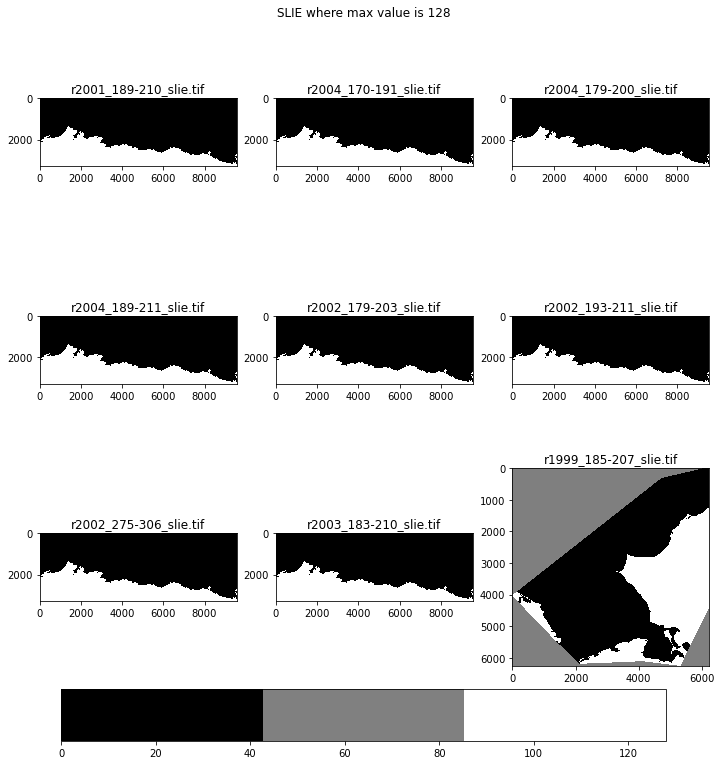

In [49]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
fig.patch.set_facecolor("white")
plt.suptitle("SLIE where max value is 128", y=0.9)
plt.subplots_adjust(hspace=0)

cmap = cm.get_cmap('gray', 3)
vmax = 128
vmin = 0

for ax, fp in zip(axs.flatten(), slie_max128_fps):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        ax.imshow(arr, vmin=vmin, vmax=vmax, cmap=cmap, interpolation="none")
        ax.set_title(fp.name)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")

From these plots it seems that a 0 value indicates no SLIE (water or non-landfast sea ice) and that a 128 value indicates a landmask. The middle range values (gray) in the bottom-right Chukchi panel look like NoData to me. Let's compare these scenes to some SLIE scenes that have the full range (0 to 255) of values.

In [51]:
slie_max255_fps = random.sample(list(slie_df[slie_df["max"] == 255.0]["fp"].values), 9)

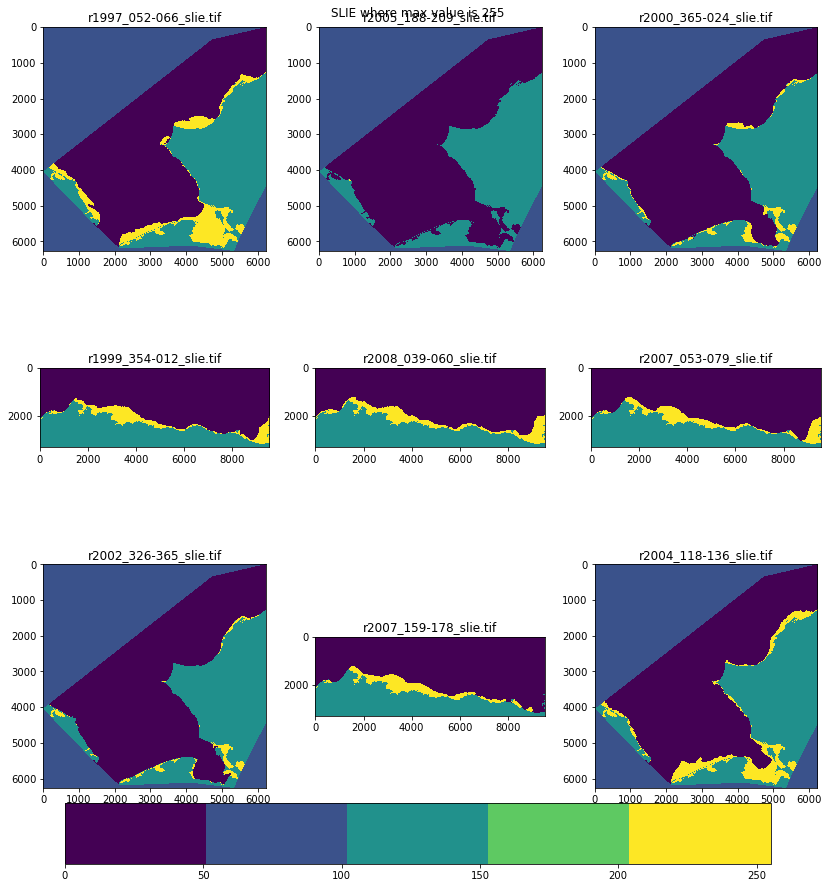

In [52]:
fig, axs = plt.subplots(3, 3, figsize=(14, 14))
fig.patch.set_facecolor("white")
plt.suptitle("SLIE where max value is 255", y=0.9)

cmap = cm.get_cmap("viridis", 5)
vmax = 255
vmin = 0

for ax, fp in zip(axs.flatten(), slie_max255_fps):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        ax.imshow(arr, vmin=vmin, vmax=vmax, cmap=cmap, interpolation="none")
        ax.set_title(fp.name)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")

In [53]:
for fp in slie_max255_fps:
    with rasterio.open(fp) as src:
        arr = src.read(1)
        print(np.unique(arr))

[  0  64 128 255]
[  0  64 128 255]
[  0  64 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0  64 128 255]
[  0 128 255]
[  0  64 128 255]


Interesting! The maps and the lists of unique values suggest these interpretations of the pixel values:
 - 0 (purple): No SLIE is present for this pixel. This means either water, or sea-ice that is NOT landfast.
 - 255 (yellow): landfast sea ice (SLIE) is present for this pixel
 - 128 (green): A landmask. The landmask appears constant across each geotiff sampled thus far.
 - 63, 64, etc. (blue): To my eye these pixels are "NoData" as they are consistent across the Chukchi scenes and occupy primarily edges and corners in the images.
 
The previous nine scenes that lack 255 values are consistent with this scheme, those scenes just did not have any detectable landfast sea ice.
Next we can look at the different "stacked" flavors of SLIE.

In [54]:
beaufort_dir = scratch_dir/"Beaufort/"
beaufort_stack_fps = [x for x in beaufort_dir.rglob("*stack*")]
chukchi_dir = scratch_dir/"Chukchi/"
chukchi_stack_fps = [x for x in chukchi_dir.rglob("*stack*")]

In [56]:
def mp_generate_stack_slie_di(di, fp):

        trimmed_fp = fp.name[:-4]
        ice_season = fp.parts[-2]
        if "Beaufort" in str(fp):
            region = "Beaufort"
        elif "Chukchi" in str(fp):
            region = "Chukchi"
        else:
            region = "None"
        fp_key = trimmed_fp
        
        di[fp_key] = manager.dict()
        di[fp_key]["fp"] = fp
        di[fp_key]["region"] = region
        di[fp_key]["ice_season"] = ice_season
        
        with rasterio.open(fp) as src:
            arr = src.read(1).astype(float)
            arr[arr == src.nodata] = np.nan
            di[fp_key]["min"] = np.round(np.nanmin(arr), 2)
            di[fp_key]["nodata"] = src.nodata
            di[fp_key]["max"] = np.round(np.nanmax(arr), 2)
            di[fp_key]["width"] = arr.shape[1]
            di[fp_key]["height"] = arr.shape[0]
            di[fp_key]["pixel_size_m"] = src.profile["transform"][0]
            di[fp_key]["affine"] = src.profile["transform"]
            di[fp_key]["crs"] = src.profile["crs"]

In [57]:
manager = Manager()
d = manager.dict()
pool = Pool(32)
for fp in chukchi_stack_fps:
    pool.apply_async(mp_generate_stack_slie_di, args=(d, fp))
pool.close()
pool.join()

chukchi_stack_di = dict(deepcopy(d))
for k in chukchi_stack_di.keys():
    chukchi_stack_di[k] = dict(deepcopy(d[k]))
del d

In [58]:
manager = Manager()
d = manager.dict()
pool = Pool(32)
for fp in beaufort_stack_fps:
    pool.apply_async(mp_generate_stack_slie_di, args=(d, fp))
pool.close()
pool.join()

beaufort_stack_di = dict(deepcopy(d))
for k in beaufort_stack_di.keys():
    beaufort_stack_di[k] = dict(deepcopy(d[k]))
del d

In [59]:
chukchi_slie_stack_df = df_from_di(chukchi_stack_di)
beaufort_slie_stack_df = df_from_di(beaufort_stack_di)

In [60]:
beaufort_slie_stack_df.sort_values("ice_season", inplace=True)
beaufort_slie_stack_df

,fp,region,ice_season,min,nodata,max,width,height,pixel_size_m,affine,crs
SLIEstack_color+edge_1999-00,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,1999-00,0.0,None,31.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEstack_1999-00,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,1999-00,0.0,None,29.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEdgestack_1999-00,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,1999-00,0.0,None,29.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEstack_2000-01,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2000-01,0.0,None,28.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEstack_color+edge_2000-01,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2000-01,0.0,None,30.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEdgestack_2000-01,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2000-01,0.0,None,28.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEstack_2001-02,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2001-02,0.0,None,33.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEdgestack_2001-02,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2001-02,0.0,None,33.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEstack_color+edge_2001-02,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2001-02,0.0,None,35.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."
SLIEdgestack_2002-03,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2002-03,0.0,None,27.0,9554,3298,100.0,"(100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...","(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d..."


From this DataFrame we can see that the Beaufort stacked files are consistent in dimension (`9554 x 3298`) and pixel size (`100 m`), although some scenes have different affine transformations. We'll want to take a closer look at the scenes that depart from the majority affine transformation Also, all of these scenes lack a "NoData" value. We'll want to assign one in pre-processing if we use these stacked data.

We can also see that the value range has changed from the 0-255 range of the individual scenes - all values are now somewhere between 0 and 35. We'll need to do some interpretation to figure out what these values mean. My guess: the values correspond to the total number of individual SLIE files for a given ice season. The pixel value is essentialy the count of the number of times a certain pixel was observed to be covered by landfast sea ice. This also explains why each ice season has a different value.

I'm still not sure what the difference in the stack flavors (i.e., the "color" and "edge" file conventions) means. Each ice season has three stack files: vanilla, "Edgestack", and "color+edge." The latter has  the greatest value range (max. value is increased by 2).

We're going to have to plot some of these to learn more. A good starting place is the data with oddball affine transforms.

In [61]:
beaufort_slie_stack_df["affine"]

SLIEstack_color+edge_1999-00    (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEstack_1999-00               (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEdgestack_1999-00            (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEstack_2000-01               (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEstack_color+edge_2000-01    (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEdgestack_2000-01            (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEstack_2001-02               (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEdgestack_2001-02            (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEstack_color+edge_2001-02    (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEdgestack_2002-03            (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEstack_2002-03               (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEstack_color+edge_2002-03    (100.0, 0.0, -236180.0, 0.0, -100.0, 2509919.0...
SLIEdgestack_200

We can see that some of these data have slightly different values that prescribe the translation parameters for the transformation! The "whole number" parameters appear correct and are the majority case.

In [62]:
reference = np.array([beaufort_slie_stack_df.iloc[0].affine.c, beaufort_slie_stack_df.iloc[0].affine.f]) 
target = np.array([beaufort_slie_stack_df.iloc[-3].affine.c, beaufort_slie_stack_df.iloc[-3].affine.f])
delta = reference - target
print("reference affine params", reference)
print("questionable affine params", target)
print("delta", delta)

reference affine params [-236180. 2509919.]
questionable affine params [-236180. 2509919.]
delta [0. 0.]


In [63]:
beaufort_slie_stack_df["aff_c"] = [x.c for x in beaufort_slie_stack_df.affine.values]
beaufort_slie_stack_df[beaufort_slie_stack_df["aff_c"] != -236180.0]
odd_affine_fps = beaufort_slie_stack_df[beaufort_slie_stack_df["aff_c"] != -236180.0]["fp"].values
odd_affine_fps

array([PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2004-05/SLIEstack_2004-05.tif'),
       PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2005-06/SLIEstack_2005-06.tif'),
       PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2006-07/SLIEstack_2006-07.tif'),
       PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2007-08/SLIEstack_2007-08.tif')],
      dtype=object)

SLIEstack_2004-05.tif upper-left pixel x & y coordinates:  [-236250.00688041828, 2509950.007233796]
SLIEstack_color+edge_1999-00.tif upper-left pixel x & y coordinates:  [-236180.0, 2509919.0]


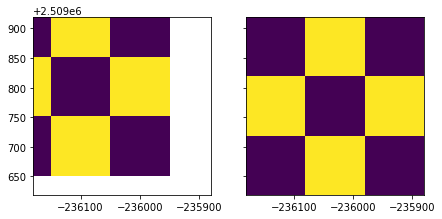

In [64]:
temp_fps = [odd_affine_fps[0], beaufort_slie_stack_df.iloc[0]["fp"]]

# make a checkerboard array for visualizing the grids
checker_arr = np.indices((3, 3)).sum(axis=0) % 2

# setup a plot for showing the grids side-by-side
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(7, 4), sharey=True, sharex=True)

for fp, ax in zip(temp_fps, axs):
    with rasterio.open(fp) as src:
        print(f"{fp.name} upper-left pixel x & y coordinates: ", [src.meta["transform"][i] for i in (2, 5)])
        # plot the checker arr using the grid transform of each with constant x and y axes
        show(checker_arr, transform=src.transform, ax=ax)

That doesn't look good! We'll want to converge on a single affine transform in pre-processing if we use the stacks.
Credit to Kyle Redilla for the grid shift figure above.

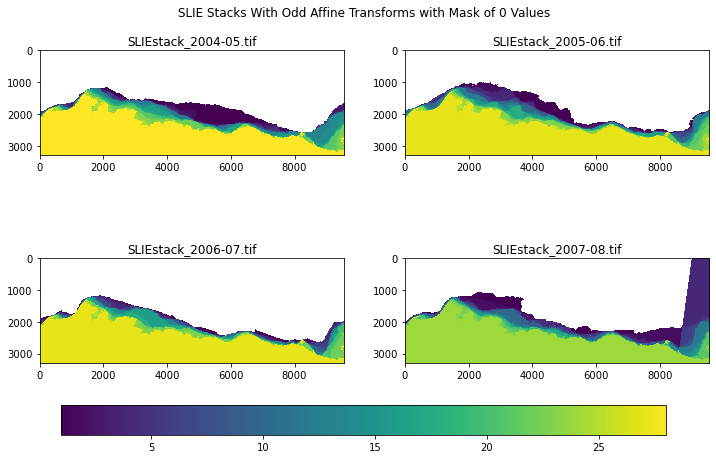

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
fig.patch.set_facecolor("white")
plt.suptitle("SLIE Stacks With Odd Affine Transforms with Mask of 0 Values", y=0.9)

vmax = 28
vmin = 1

for ax, fp in zip(axs.flatten(), odd_affine_fps):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        hide_zero = np.ma.masked_where(arr == 0, arr)
        ax.imshow(hide_zero, vmin=vmin, vmax=vmax, cmap="viridis", interpolation="none")
        ax.set_title(fp.name)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")


The bottom right panel has some weird angular artifacts at the eastern edge. Other than that (and the wacky affine shift) these data look OK enough. Let's check a sample of the non-wacky Beaufort SLIE stacks.

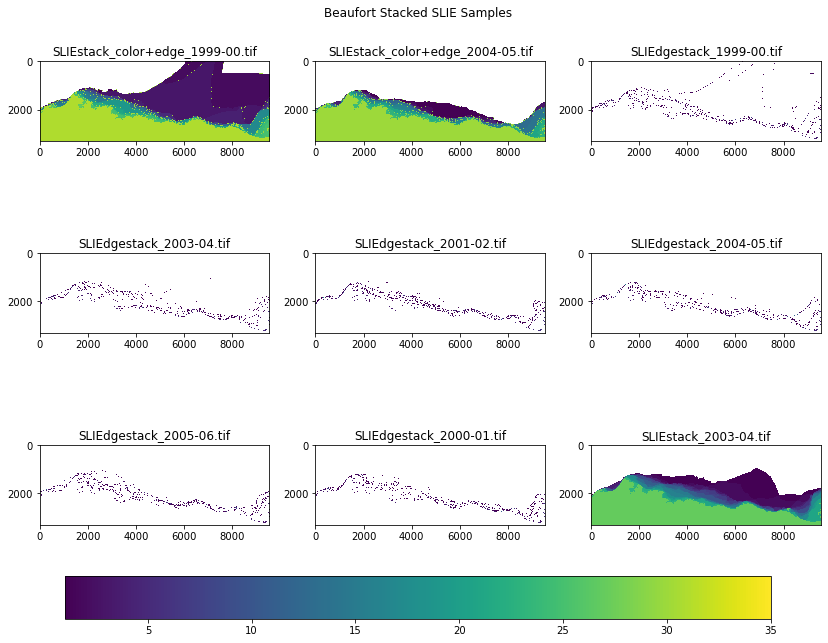

In [66]:
normal_affine_fps = beaufort_slie_stack_df[beaufort_slie_stack_df["aff_c"] == -236180.0]["fp"].values
beaufort_stack_sample = random.sample(list(normal_affine_fps), 9)

fig, axs = plt.subplots(3, 3, figsize=(14, 10))
fig.patch.set_facecolor("white")
plt.suptitle("Beaufort Stacked SLIE Samples", y=0.9)
vmax = 35
vmin = 1

for ax, fp in zip(axs.flatten(), beaufort_stack_sample):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        hide_zero = np.ma.masked_where(arr == 0, arr)
        ax.imshow(hide_zero, vmin=vmin, vmax=vmax, cmap="viridis", interpolation="none")
        ax.set_title(fp.name)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")

The vanilla stacks look as expected. The edge stacks are a bit of surprise - it looks like a mask of the narrowest and widest extents of the landfast ice perhaps? We need to look at unique values there, and to see how many pixels have data per column. The color and edge combination image hint at how these edges are interpreted. It looks like having some threshold value indicates the edge. We can do some masking here to get at what might be happening. 

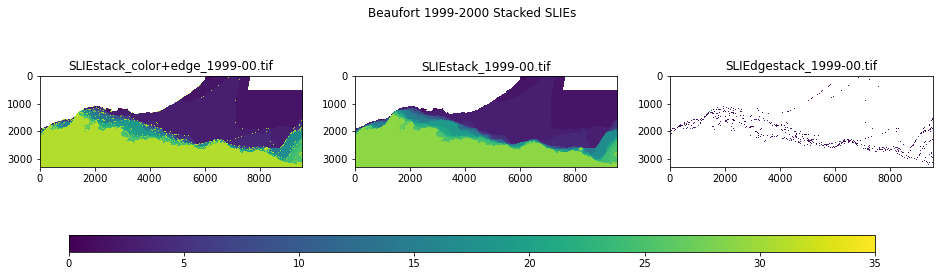

In [67]:
beaufort_99_00_fps = beaufort_slie_stack_df[beaufort_slie_stack_df["ice_season"] == "1999-00"]["fp"].values

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig.patch.set_facecolor("white")
plt.suptitle("Beaufort 1999-2000 Stacked SLIEs", y=0.9)
vmax = 35
vmin = 0

for ax, fp in zip(axs.flatten(), beaufort_99_00_fps):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        hide_zero = np.ma.masked_where(arr == 0, arr)
        ax.imshow(hide_zero, vmin=vmin, vmax=vmax, cmap="viridis", interpolation="none")
        ax.set_title(fp.name)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
fig.colorbar(axs[0].images[0], cax=cbar_ax, orientation="horizontal")

In [68]:
for fp in beaufort_99_00_fps:
    with rasterio.open(fp) as src:
        arr = src.read(1)
        print(fp.name)
        print("Unique values:\n", np.unique(arr))

SLIEstack_color+edge_1999-00.tif
Unique values:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31]
SLIEstack_1999-00.tif
Unique values:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
SLIEdgestack_1999-00.tif
Unique values:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 25 29]


I'm suprised by the range of values in the "edgestack" variation.

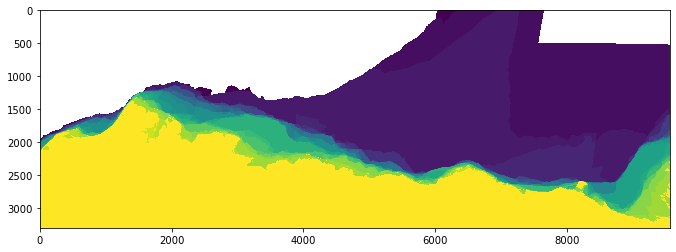

In [69]:
edge_arr = rasterio.open(beaufort_99_00_fps[1]).read(1)
hide_zero = np.ma.masked_where(edge_arr == 0, edge_arr)

plt.figure(figsize=(18,4))
plt.imshow(hide_zero, vmax=29, interpolation="none")

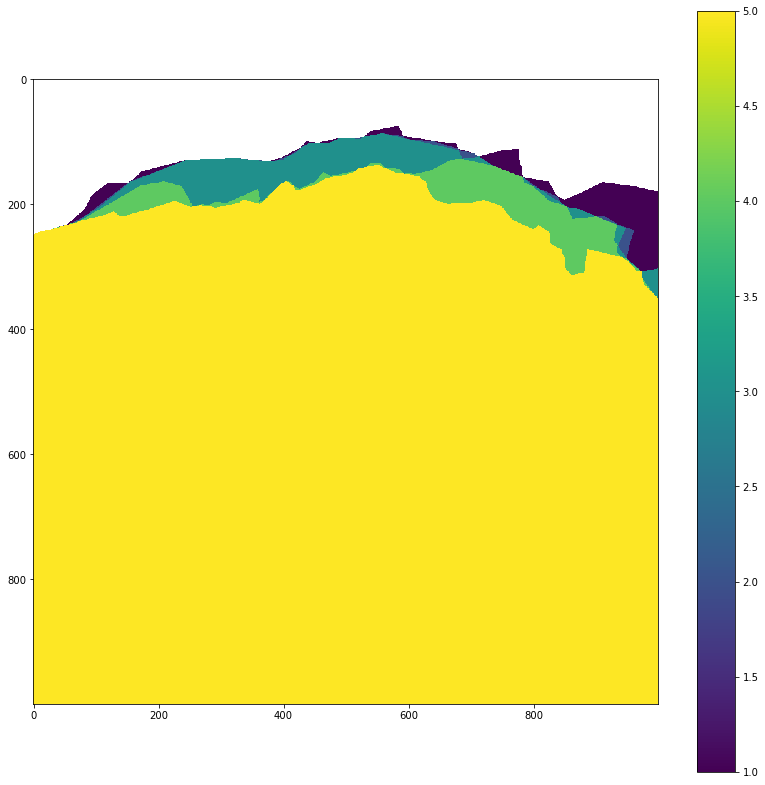

In [70]:
# zoom in and crank the color range way down
plt.figure(figsize=(14,14))
plt.imshow(hide_zero[1000:2000,1500:2500], vmax=5, interpolation="none")
plt.colorbar()

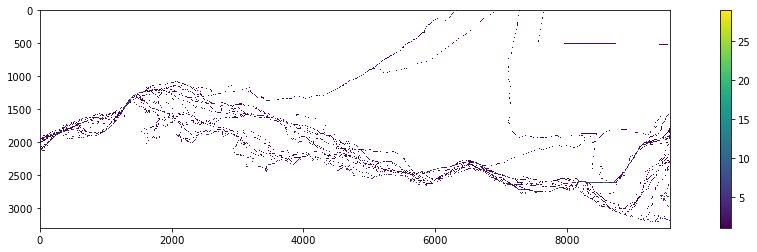

In [71]:
color_edge_arr = rasterio.open(beaufort_99_00_fps[2]).read(1)
ce_mask = np.ma.masked_where((color_edge_arr == 0) | (color_edge_arr == 31), color_edge_arr)

plt.figure(figsize=(18,4))
plt.imshow(ce_mask, interpolation="none")
plt.colorbar()

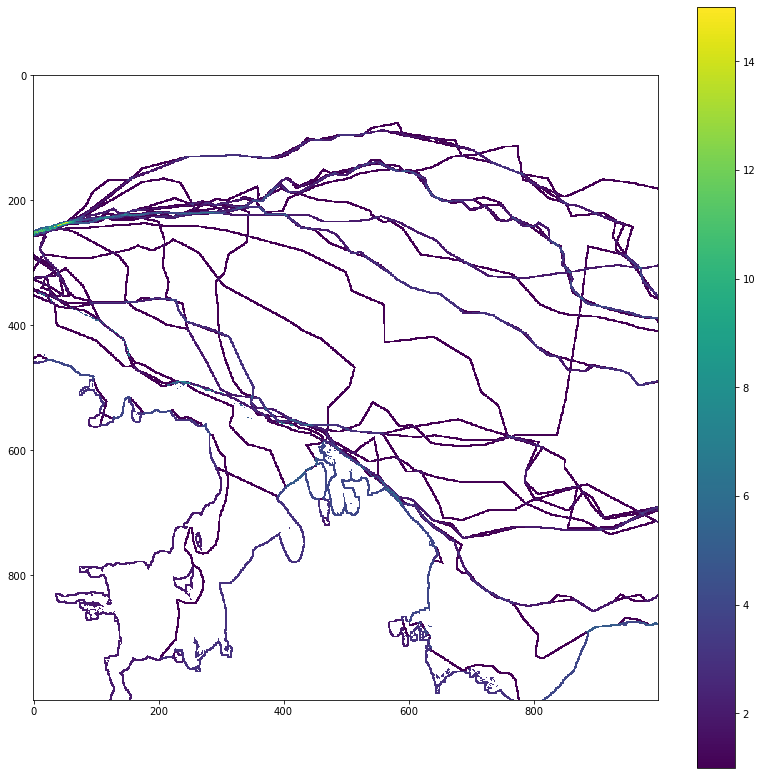

In [72]:
# zoom in and crank the color range way down
plt.figure(figsize=(14,14))
plt.imshow(ce_mask[1000:2000,1500:2500], interpolation="none")
plt.colorbar()

I think these are counts of where the landfast ice edge is. So if the value is 5, the ice edge was recorded to be in that location for 5 observation windows. For the color plus edge flavor of SLIE, the edges are indicated with the pentultimate maximum value of the dataset. The maximum value is reserved for the landmask. The edges are basically contours. We need to do the same analysis for the Chukchi dataset.

In [73]:
chukchi_slie_stack_df.sort_values("ice_season", inplace=True)

In [74]:
chuk_slie_stack_reg_season_count = chukchi_slie_stack_df['ice_season'].value_counts()
chuk_slie_stack_min_count = chukchi_slie_stack_df['min'].value_counts()
chuk_slie_stack_max_count = chukchi_slie_stack_df['max'].value_counts()
chuk_slie_stack_ps_count = chukchi_slie_stack_df['pixel_size_m'].value_counts()
chuk_slie_stack_width_count = chukchi_slie_stack_df['width'].value_counts()
chuk_slie_stack_height_count = chukchi_slie_stack_df['height'].value_counts()

In [77]:
chuk_slie_stack_min_count

0.0    32
Name: min, dtype: int64

In [78]:
chuk_slie_stack_max_count

27.0    6
29.0    6
28.0    5
26.0    4
30.0    4
25.0    2
31.0    2
24.0    1
32.0    1
22.0    1
Name: max, dtype: int64

In [79]:
chuk_slie_stack_ps_count

100.0    32
Name: pixel_size_m, dtype: int64

In [80]:
chuk_slie_stack_width_count

6234    32
Name: width, dtype: int64

In [81]:
chuk_slie_stack_height_count

6271    32
Name: height, dtype: int64

In [82]:
chukchi_slie_stack_df['affine'].value_counts()

(100.0, 0.0, -859401.4481000006, 0.0, -100.0, 2423189.104800001, 0.0, 0.0, 1.0)    32
Name: affine, dtype: int64

In [83]:
chukchi_slie_stack_df['crs'].value_counts()

(proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a, rf, units, no_defs)    28
(init)                                                                  4
Name: crs, dtype: int64

In [84]:
chukchi_slie_stack_df['crs']

SLIEstack_1996-97_col           (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_color+edge_1996-97    (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_1996-97               (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_1997-98_col           (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_1997-98               (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_color+edge_1997-98    (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_1998-99_col                                                      (init)
SLIEstack_1998-99                                                          (init)
SLIEstack_color+edge_1998-99    (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_color+edge_1999-00    (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_1999-00               (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_1999-00_col           (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, a...
SLIEstack_color+

In [85]:
chukchi_slie_stack_df.iloc[-3]['crs']

CRS.from_wkt('PROJCS["unnamed",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257024882273,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [86]:
chukchi_slie_stack_df.iloc[0]['crs'].to_wkt()

'PROJCS["unnamed",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257024882273,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [87]:
crs3338 = chukchi_slie_stack_df.iloc[-3]['crs']
crs3338.to_wkt()

'PROJCS["unnamed",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257024882273,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [88]:
from rasterio.crs import CRS
CRS.from_epsg(3338).to_wkt()

'PROJCS["NAD83 / Alaska Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3338"]]'

OK well at least the data have consistent value ranges, pixel sizes, and affine transformations, although we do have some CRS jank at play for some (4) of the files. Beaufort data have the same issue. These are also different from the Rasterio CRS WKT for 3338. We probably want to converge on the latter for all of these.

In [89]:
beaufort_slie_stack_df["crs"]

SLIEstack_color+edge_1999-00    (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEstack_1999-00               (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEdgestack_1999-00            (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEstack_2000-01               (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEstack_color+edge_2000-01    (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEdgestack_2000-01            (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEstack_2001-02               (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEdgestack_2001-02            (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEstack_color+edge_2001-02    (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEdgestack_2002-03            (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEstack_2002-03               (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEstack_color+edge_2002-03    (proj, lat_0, lon_0, lat_1, lat_2, x_0, y_0, d...
SLIEdgestack_200

In [90]:
chuk_slie_stack_reg_season_count

1996-97    3
1997-98    3
1998-99    3
1999-00    3
2000-01    3
2001-02    3
2002-03    3
2004-05    3
2006-07    3
2003-04    2
2005-06    2
2007-08    1
Name: ice_season, dtype: int64

In [91]:
chukchi_slie_stack_df["ice_season"].sort_values()

SLIEstack_1996-97_col           1996-97
SLIEstack_color+edge_1996-97    1996-97
SLIEstack_1996-97               1996-97
SLIEstack_1997-98_col           1997-98
SLIEstack_1997-98               1997-98
SLIEstack_color+edge_1997-98    1997-98
SLIEstack_1998-99_col           1998-99
SLIEstack_1998-99               1998-99
SLIEstack_color+edge_1998-99    1998-99
SLIEstack_color+edge_1999-00    1999-00
SLIEstack_1999-00               1999-00
SLIEstack_1999-00_col           1999-00
SLIEstack_color+edge_2000-01    2000-01
SLIEstack_2000-01_col           2000-01
SLIEstack_2000-01               2000-01
SLIEstack_color+edge_2001-02    2001-02
SLIEstack_2001-02               2001-02
SLIEstack_2001-02_col           2001-02
SLIEstack_2002-03               2002-03
SLIEstack_color+edge_2002-03    2002-03
SLIEstack_2002-03_col           2002-03
SLIEstack_color+edge_2003-04    2003-04
SLIEstack_2003-04               2003-04
SLIEstack_2004-05               2004-05
SLIEstack_color+edge_2004-05    2004-05


The Chukchi edge data is missing for 2007-08, while 2003-04 and 2005-06 are missing a geotiff. We should plot a few of these data too.

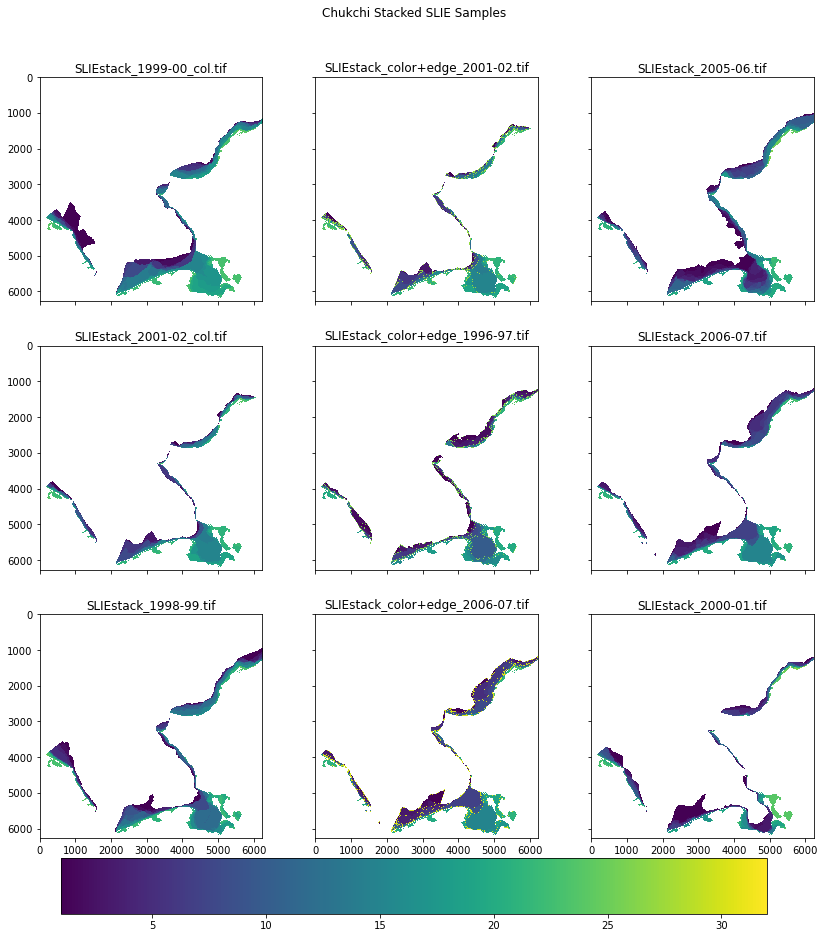

In [92]:
chukchi_stack_fps = chukchi_slie_stack_df["fp"].values
chukchi_stack_sample = random.sample(list(chukchi_stack_fps), 9)

fig, axs = plt.subplots(3, 3, figsize=(14, 14), sharex=True, sharey=True)
fig.patch.set_facecolor("white")
plt.suptitle("Chukchi Stacked SLIE Samples", y=0.95)
vmax = 32
vmin = 1


for ax, fp in zip(axs.flatten(), chukchi_stack_sample):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        
        if "col" in fp.name:
            other_garbage_val = arr[0, 0]
            uppermask_val = np.unique(arr)[-2]
            msk = np.ma.masked_where((arr == 0) | (arr == uppermask_val) | (arr == other_garbage_val), arr)
        else:
            uppermask_val = arr.max()
            msk = np.ma.masked_where((arr == 0) | (arr == uppermask_val), arr)
        
        ax.imshow(msk, vmin=vmin, vmax=vmax, cmap="viridis", interpolation="none")
        ax.set_title(fp.name)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.055])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")

It looks like the landmask has the same value as this weird, NoData-esque, angular blob thing that is in every single image. This masking scheme seems to retain the data that it should. At this point my recommendation is to ignore everything that isn't just an individual SLIE derived from the three-mosaic sets.

In [93]:
monthly_mmm_dir = Path('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/AllSeasonsAnalysis/MonthlySLIEs/MinMeanMax')

In [94]:
beaufort_mo_mmm_fps = sorted([x for x in monthly_mmm_dir.rglob("*.tif")])

In [95]:
for fp in beaufort_mo_mmm_fps:
    with rasterio.open(fp) as src:
        arr = src.read(1)
        print(fp.name)
        print("Unique values:\n", np.unique(arr))

moSLIE_01_max.tif
Unique values:
 [  0 128 255]
moSLIE_01_mean.tif
Unique values:
 [  0 128 255]
moSLIE_01_min.tif
Unique values:
 [  0 128 255]
moSLIE_02_max.tif
Unique values:
 [  0 128 255]
moSLIE_02_mean.tif
Unique values:
 [  0 128 255]
moSLIE_02_min.tif
Unique values:
 [  0 128 255]
moSLIE_03_max.tif
Unique values:
 [  0 128 255]
moSLIE_03_mean.tif
Unique values:
 [  0 128 255]
moSLIE_03_min.tif
Unique values:
 [  0 128 255]
moSLIE_04_max.tif
Unique values:
 [  0 128 255]
moSLIE_04_mean.tif
Unique values:
 [  0 128 255]
moSLIE_04_min.tif
Unique values:
 [  0 128 255]
moSLIE_05_max.tif
Unique values:
 [  0 128 255]
moSLIE_05_mean.tif
Unique values:
 [  0 128 255]
moSLIE_05_min.tif
Unique values:
 [  0 128 255]
moSLIE_06_max.tif
Unique values:
 [  0 128 255]
moSLIE_06_mean.tif
Unique values:
 [  0 128 255]
moSLIE_06_min.tif
Unique values:
 [  0 128 255]
moSLIE_07_max.tif
Unique values:
 [  0 128 255]
moSLIE_07_mean.tif
Unique values:
 [  0 128 255]
moSLIE_07_min.tif
Unique values:


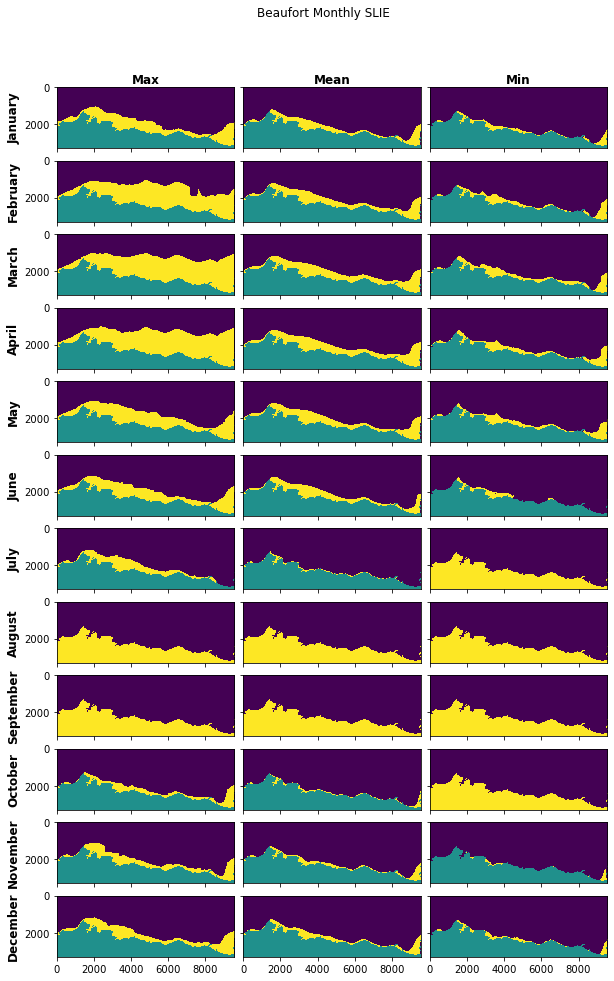

In [96]:
import calendar

fig, axs = plt.subplots(12, 3, figsize=(10, 16), sharex=True, sharey=True)
for i in np.arange(12):
    fig.axes[i*3].set_ylabel(list(calendar.month_name)[i+1], weight = 'bold', fontsize = 12)

fig.axes[0].set_xlabel("Max", weight = 'bold', fontsize = 12)
fig.axes[1].set_xlabel("Mean", weight = 'bold', fontsize = 12)
fig.axes[2].set_xlabel("Min", weight = 'bold', fontsize = 12)

fig.axes[0].xaxis.set_label_position('top')
fig.axes[1].xaxis.set_label_position('top')
fig.axes[2].xaxis.set_label_position('top')

fig.patch.set_facecolor("white")
plt.suptitle("Beaufort Monthly SLIE", y=0.95)
plt.subplots_adjust(wspace=0.01)

for ax, fp in zip(axs.flatten(), beaufort_mo_mmm_fps):
    with rasterio.open(fp) as src:
        arr = src.read(1)
                
        ax.imshow(arr, cmap="viridis", interpolation="none")

plt.show()

## Data Puzzle: `lfiw_` files

These files appear to be present for all years having SLIE data. We know that LFIW stands for landfast ice width. Based on the paper, I'd expect these data to represent 200 discrete point locations that represent the binned means of a larger number of transects.

In [97]:
df = pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/lfiw.csv"))
df.head()

,Unnamed: 0,,r2004_276-304_slie.tif,r2004_286-315_slie.tif,r2004_300-328_slie.tif,r2004_313-336_slie.tif,r2004_324-345_slie.tif,r2004_334-352_slie.tif,r2004_343-360_slie.tif,r2004_348-010_slie.tif,...,r2005_097-123_slie.tif,r2005_111-128_slie.tif,r2005_120-137_slie.tif,r2005_126-152_slie.tif,r2005_135-161_slie.tif,r2005_150-168_slie.tif,r2005_157-178_slie.tif,r2005_166-190_slie.tif,r2005_174-195_slie.tif,r2005_188-211_slie.tif
0,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,0.6,0.6,0.6,0.6,0.6,0.0,0.0,0.0,0.0
2,,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.4,1.4,1.4,1.4,1.4,1.4,0.2,0.0,0.0,0.0
3,,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,1.3,1.3,1.3,1.3,1.3,0.1,0.0,0.0,0.0
4,,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.1,2.1,2.1,2.1,2.1,2.1,0.4,0.0,0.0,0.0


In [5]:
pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/lfiw_moregmean.csv"))

,Unnamed: 0,,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Wainwright-Barrow,0,4.1,4.3,4.6,4.8,5.5,4.5,0.1,NaN,NaN,0.1,0.3,1.5
1,Barrow-Kaktovik,1,16.2,24.7,31.5,34.2,27.9,31.9,1.2,NaN,NaN,0.8,7.6,15.2
2,Kaktovik-HerschelIsl,2,3.0,9.5,15.1,12.4,10.2,9.9,0.4,NaN,NaN,0.2,0.9,1.4
3,HerschelIsland-Macke,3,29.8,43.4,48.5,49.0,54.5,23.8,0.0,NaN,NaN,0.9,8.1,11.1


In [6]:
pd.read_csv(scratch_dir.joinpath("Chukchi/2004-05/lfiw_moregstdev.csv"))

,Unnamed: 0,,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,NorthernChukotkaPeni,0,3.0,3.3,5.9,6.7,5.3,4.8,0.3,NaN,NaN,0.0,0.6,1.8
1,NorthernSewardPenins,1,3.9,7.9,9.7,13.3,12.9,5.4,0.0,NaN,NaN,0.0,2.8,3.8
2,OuterKotzebueSound,2,8.4,36.1,41.4,39.1,36.8,0.3,0.0,NaN,NaN,0.7,3.3,5.5
3,InnerKotzebueSound,3,6.6,15.2,10.6,10.5,17.0,0.1,0.0,NaN,NaN,0.6,4.8,7.3
4,CapeKruzenstern-Poin,4,1.7,2.0,2.8,2.8,2.6,0.1,0.0,NaN,NaN,0.0,0.4,0.5
5,PointHope-CapeLisbur,5,3.6,3.8,3.8,4.7,4.3,1.5,0.0,NaN,NaN,0.0,0.1,0.1
6,CapeLisburne-Wainwri,6,5.2,5.8,5.5,6.4,6.5,8.7,0.0,NaN,NaN,1.8,1.9,2.1


In [7]:
pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/lfiw_regmean.csv"))

,Unnamed: 0,,r2004_276-304_slie.tif,r2004_286-315_slie.tif,r2004_300-328_slie.tif,r2004_313-336_slie.tif,r2004_324-345_slie.tif,r2004_334-352_slie.tif,r2004_343-360_slie.tif,r2004_348-010_slie.tif,...,r2005_097-123_slie.tif,r2005_111-128_slie.tif,r2005_120-137_slie.tif,r2005_126-152_slie.tif,r2005_135-161_slie.tif,r2005_150-168_slie.tif,r2005_157-178_slie.tif,r2005_166-190_slie.tif,r2005_174-195_slie.tif,r2005_188-211_slie.tif
0,Wainwright-Barrow,0,0.0,0.2,0.4,0.4,0.5,1.1,1.3,1.4,...,4.3,5.1,5.9,5.3,5.4,5.3,3.4,0.4,0.0,0.0
1,Barrow-Kaktovik,1,0.2,1.4,3.9,7.4,11.5,14.8,20.5,13.0,...,27.9,27.9,28.1,28.7,29.1,32.8,30.0,3.4,0.3,0.0
2,Kaktovik-HerschelIsl,2,0.1,0.4,0.6,1.1,1.0,1.3,1.7,1.2,...,8.8,9.2,9.5,9.5,10.5,11.1,10.6,1.3,0.0,0.0
3,HerschelIsland-Macke,3,0.1,1.7,4.0,9.0,11.2,11.9,12.2,10.6,...,48.6,53.8,53.5,53.6,47.1,37.8,1.5,0.0,0.0,0.0


In [8]:
pd.read_csv(scratch_dir.joinpath("Chukchi/2004-05/lfiw_regstdev.csv"))

,Unnamed: 0,,r2004_279-304_slie.tif,r2004_294-321_slie.tif,r2004_303-328_slie.tif,r2004_318-338_slie.tif,r2004_326-345_slie.tif,r2004_334-352_slie.tif,r2004_342-362_slie.tif,r2004_351-010_slie.tif,...,r2005_087-113_slie.tif,r2005_096-123_slie.tif,r2005_111-137_slie.tif,r2005_121-147_slie.tif,r2005_135-161_slie.tif,r2005_144-168_slie.tif,r2005_159-178_slie.tif,r2005_166-189_slie.tif,r2005_174-195_slie.tif,r2005_188-209_slie.tif
0,NorthernChukotkaPeni,0,0.0,0.0,0.2,0.8,0.7,1.2,2.1,1.1,...,6.6,5.2,5.7,5.4,5.5,5.7,4.4,0.3,0.3,0.3
1,NorthernSewardPenins,1,0.0,0.0,0.9,3.7,3.7,3.7,3.6,3.7,...,12.9,12.5,12.9,14.4,7.4,1.2,0.0,0.0,0.0,0.0
2,OuterKotzebueSound,2,0.7,0.0,2.2,3.9,4.4,4.7,5.7,6.3,...,38.6,39.5,39.8,30.6,0.6,0.0,0.0,0.0,0.0,0.0
3,InnerKotzebueSound,3,0.6,0.0,2.8,4.4,7.7,5.7,8.3,6.3,...,10.5,10.5,10.9,18.8,0.0,0.2,0.0,0.0,0.0,0.0
4,CapeKruzenstern-Poin,4,0.0,0.4,0.0,0.4,0.5,0.5,0.5,0.5,...,2.8,2.8,2.7,2.0,0.2,0.0,0.0,0.0,0.0,0.0
5,PointHope-CapeLisbur,5,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,...,4.8,4.4,4.5,4.2,2.6,0.0,0.0,0.0,0.0,0.0
6,CapeLisburne-Wainwri,6,0.0,2.0,2.0,2.0,2.0,1.9,2.2,2.7,...,5.1,5.1,7.0,7.1,8.6,10.1,4.8,0.0,0.0,0.0


In [98]:
lfiw_fps = sorted([x for x in scratch_dir.rglob("*lfiw*")])

So for each ice season, there is a CSV with the lanfast ice width computed from the individual SLIE (derived from the ~20 day period). Then we have the regional and regional monthly mean and standard deviation statistics. One problem I see with these data is that we are missing geospatial coordinates. The only spatial reference is the string description of a zone, like PointHope-CapeLisbrune. But maybe coordinates are lurking somewhere and we should look at the "All Season" flavors of this data too.

In [99]:
pd.read_csv(scratch_dir.joinpath("Beaufort/AllSeasonsAnalysis/MonthlySLIEs/ASCII_Data/lfiw_mo5m_N.csv"))

,Unnamed: 0,,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,,1,0.2,0.2,0.2,0.2,0.1,0.2,0.1,NaN,NaN,0.0,0.1,0.2
2,,2,0.5,0.5,0.4,0.3,0.3,0.6,0.2,NaN,NaN,0.0,0.3,0.5
3,,3,0.5,0.5,0.4,0.3,0.2,0.6,0.2,NaN,NaN,0.0,0.3,0.4
4,,4,0.7,0.8,0.6,0.4,0.4,0.9,0.4,NaN,NaN,0.1,0.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,,1931,9.4,8.7,22.1,17.5,10.1,18.6,0.0,NaN,NaN,9.9,8.7,11.1
1932,,1932,10.3,9.1,21.6,17.8,10.1,18.6,0.0,NaN,NaN,9.9,8.8,11.2
1933,,1933,12.7,9.2,21.0,17.9,10.2,18.7,0.0,NaN,NaN,9.8,7.9,11.6
1934,,1934,14.4,17.7,28.1,27.1,19.3,17.3,0.0,NaN,NaN,9.7,7.9,11.0


In [26]:
pd.read_csv(scratch_dir.joinpath("Beaufort/AllSeasonsAnalysis/MonthlySLIEs/ASCII_geocoords/moSLIE_05_min_geo.csv"))

,-112944.015625,2354295.750000
0,-112374.140625,2355347.75
1,-111810.710938,2356270.50
2,-111178.140625,2357244.25
3,-110513.382812,2358068.00
4,-109914.664062,2358966.75
...,...,...
555,717981.312500,2305291.50
556,718216.875000,2305501.75
557,718466.812500,2306010.25
558,718706.625000,2306415.50


In [100]:
wdep_df = pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/wdep.csv"))
wdep_df

,Unnamed: 0,,r2004_276-304_slie.tif,r2004_286-315_slie.tif,r2004_300-328_slie.tif,r2004_313-336_slie.tif,r2004_324-345_slie.tif,r2004_334-352_slie.tif,r2004_343-360_slie.tif,r2004_348-010_slie.tif,...,r2005_097-123_slie.tif,r2005_111-128_slie.tif,r2005_120-137_slie.tif,r2005_126-152_slie.tif,r2005_135-161_slie.tif,r2005_150-168_slie.tif,r2005_157-178_slie.tif,r2005_166-190_slie.tif,r2005_174-195_slie.tif,r2005_188-211_slie.tif
0,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0
2,,2,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,10.0,10.0,10.0,10.0
3,,3,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,10.0,10.0,10.0,10.0
4,,4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,-12.0,-12.0,-12.0,-12.0,-12.0,-12.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,,1931,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,-32.0,-42.0,-43.0,-44.0,-24.0,-24.0,21.0,21.0,21.0,21.0
1932,,1932,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,-30.0,-40.0,-40.0,-44.0,-22.0,-22.0,21.0,21.0,21.0,21.0
1933,,1933,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,-29.0,-41.0,-40.0,-44.0,-22.0,-22.0,21.0,21.0,21.0,21.0
1934,,1934,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,21.0,21.0,21.0,-42.0,21.0,21.0,21.0,21.0,21.0,21.0


OK to wrap this up - the high priority data are the individual SLIE scenes. Especially the Chukchi ones because they are definitely apart from what is in the NSIDC dataset. We need to constrain the valid raster values and have a uniform categorical representation of what is land, what is landfast ice, etc. in addition to the usual QA/QC pieces. The annual stacks and/or monthly summary products might be worth looking at. The transect stuff (water depth and landfast ice width) will sit for now but should get some QC so it can be properly archived at some point.